In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from gandalf import gaNdalF
import sys
import yaml
from Handler import *
import logging

In [2]:
pd.set_option("display.max_columns", None)  # alle Spalten anzeigen
pd.set_option("display.width", None)        # keine feste Breite
pd.set_option("display.max_colwidth", None) # volle Spalteninhalte anzeigen
pd.set_option("display.expand_frame_repr", False)  # keine Zeilenumbruchdarstellung

In [3]:
config_file_name = "MAC_FindNAN.cfg"
system_path = os.path.abspath(sys.path[0])
path_config_file = f"{system_path}/conf/{config_file_name}"
with open(path_config_file, 'r') as fp:
    print(f"open {path_config_file}")
    cfg = yaml.safe_load(fp)

open /Users/P.Gebhardt/Development/PhD/GalaxyFlow/conf/MAC_FindNAN.cfg


In [4]:
os.makedirs(cfg["PATH_OUTPUT"], exist_ok=True)

In [5]:
log_lvl = logging.INFO
nan_logger = LoggerHandler(
    logger_dict={"logger_name": "nan logger",
                 "info_logger": cfg['INFO_LOGGER'],
                 "error_logger": cfg['ERROR_LOGGER'],
                 "debug_logger": cfg['DEBUG_LOGGER'],
                 "stream_logger": cfg['STREAM_LOGGER'],
                 "stream_logging_level": log_lvl},
    log_folder_path=f"{cfg['PATH_OUTPUT']}/"
)

In [6]:
df_gandalf = pd.read_pickle(os.path.join(cfg["PATH_DATA"], cfg["FILE_NAN_DATAFRAME"]))
df_balrog = pd.read_pickle(os.path.join(cfg["PATH_DATA"], cfg["FILENAME_COMPLETE_DATA_ODET"]))
df_gandalf_cut = pd.read_pickle(cfg["PATH_CUT_DATA"])

In [7]:
print("df_gandalf", len(df_gandalf))
print("df_balrog", len(df_balrog))
print("df_gandalf_cut", len(df_gandalf_cut))

df_gandalf 8583801
df_balrog 8612535
df_gandalf_cut 8588150


In [8]:
lst_input_columns_gandalf = [
    "BDF_MAG_DERED_CALIB_R_trans", "BDF_MAG_DERED_CALIB_I_trans", "BDF_MAG_DERED_CALIB_Z_trans",
    "BDF_MAG_ERR_DERED_CALIB_R_trans", "BDF_MAG_ERR_DERED_CALIB_I_trans", "BDF_MAG_ERR_DERED_CALIB_Z_trans",
    "Color BDF MAG U-G_trans", "Color BDF MAG G-R_trans", "Color BDF MAG R-I_trans", "Color BDF MAG I-Z_trans",
    "Color BDF MAG Z-J_trans", "Color BDF MAG J-H_trans", "Color BDF MAG H-K_trans",
    "AIRMASS_WMEAN_R_trans", "AIRMASS_WMEAN_I_trans", "AIRMASS_WMEAN_Z_trans",
    "MAGLIM_R_trans", "MAGLIM_I_trans", "MAGLIM_Z_trans",
    "FWHM_WMEAN_R_trans", "FWHM_WMEAN_I_trans", "FWHM_WMEAN_Z_trans",
    "BDF_T_trans", "BDF_G_trans", "EBV_SFD98_trans"
]
lst_input_columns_balrog = ["BDF_MAG_DERED_CALIB_R", "BDF_MAG_DERED_CALIB_I", "BDF_MAG_DERED_CALIB_Z",
    "BDF_MAG_ERR_DERED_CALIB_R", "BDF_MAG_ERR_DERED_CALIB_I", "BDF_MAG_ERR_DERED_CALIB_Z",
    "Color BDF MAG U-G", "Color BDF MAG G-R", "Color BDF MAG R-I", "Color BDF MAG I-Z",
    "Color BDF MAG Z-J", "Color BDF MAG J-H", "Color BDF MAG H-K",
    "AIRMASS_WMEAN_R", "AIRMASS_WMEAN_I", "AIRMASS_WMEAN_Z",
    "MAGLIM_R", "MAGLIM_I", "MAGLIM_Z",
    "FWHM_WMEAN_R", "FWHM_WMEAN_I", "FWHM_WMEAN_Z",
    "BDF_T", "BDF_G", "EBV_SFD98"
]
lst_target_columns_gandalf = [
    "unsheared/mag_r_trans", "unsheared/mag_i_trans", "unsheared/mag_z_trans", "unsheared/mag_err_r_trans",
    "unsheared/mag_err_i_trans", "unsheared/mag_err_z_trans", "unsheared/snr_trans", "unsheared/size_ratio_trans",
    "unsheared/weight_trans", "unsheared/T_trans"
]
lst_target_columns_balrog = [
    "unsheared/mag_r", "unsheared/mag_i", "unsheared/mag_z", "unsheared/mag_err_r",
    "unsheared/mag_err_i", "unsheared/mag_err_z", "unsheared/snr", "unsheared/size_ratio",
    "unsheared/weight", "unsheared/T"
]

In [9]:
gandalf = gaNdalF(gandalf_logger=nan_logger, cfg=cfg)

18.05.2025 14:57:18 - Message: Init gaNdalF - Logger name: nan logger stream - Logger level: INFO
18.05.2025 14:57:18 - Message: Init GalaxyDataset - Logger name: nan logger stream - Logger level: INFO
18.05.2025 14:57:18 - Message: Load /Volumes/elmichelangelo_external_ssd_1/Data/gandalf_test_data_ncuts_ndef_rnan_3031255.pkl  data set - Logger name: nan logger stream - Logger level: INFO
18.05.2025 14:57:32 - Message: shape run dataset: (3031255, 125) - Logger name: nan logger stream - Logger level: INFO
18.05.2025 14:57:32 - Message: Sample 10000 random data from run data set - Logger name: nan logger stream - Logger level: INFO
18.05.2025 14:57:32 - Message: Run cut cols: ['unsheared/extended_class_sof', 'unsheared/flags_gold', 'match_flag_1.5_asec', 'flags_foreground', 'flags_badregions', 'flags_footprint', 'bal_id', 'ID', 'injection_counts', 'unsheared/e_1', 'unsheared/e_2', 'HPIX_4096', 'unsheared/dec', 'unsheared/ra', 'BDF_FLUX_DERED_CALIB_R', 'BDF_FLUX_DERED_CALIB_I', 'BDF_FLUX

In [10]:
df_gandalf_cut = gandalf.apply_cuts(df_gandalf_cut)
df_balrog_cut = gandalf.apply_cuts(df_balrog)

Apply unsheared object cuts
Length of catalog after applying unsheared object cuts: 7172657
Apply flag cuts
Length of catalog after applying flag cuts: 6234328
Apply unsheared shear cuts
Length of catalog after applying unsheared shear cuts: 2516206
perform binaries cut


/Users/P.Gebhardt/Development/PhD/GalaxyFlow/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


len w/ binaries 2515927
define mask
pass:  2411020
fail:  104907
Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 2337112
Apply unsheared object cuts
Length of catalog after applying unsheared object cuts: 8554517
Apply flag cuts
Length of catalog after applying flag cuts: 7375026
Apply unsheared shear cuts
Length of catalog after applying unsheared shear cuts: 2595330
perform binaries cut
len w/ binaries 2595011
define mask
pass:  2482872
fail:  112139
Apply unsheared mag cuts
Length of catalog after applying unsheared mag cuts: 2417436


In [11]:
df_balrog_columns = df_balrog[lst_input_columns_balrog+lst_target_columns_balrog]
df_gandalf_columns = df_gandalf[lst_input_columns_gandalf+lst_target_columns_gandalf]
df_gandalf_cut_columns = df_gandalf_cut[lst_input_columns_balrog+lst_target_columns_balrog]

In [12]:
df_gandalf_columns.columns = [col.replace("_trans", "") for col in df_gandalf_columns.columns]

In [13]:
df_stats = pd.DataFrame({
    "balrog_min": df_balrog_columns.min(),
    "balrog_max": df_balrog_columns.max(),
    "gandalf_min": df_gandalf_columns.min(),
    "gandalf_max": df_gandalf_columns.max(),
    "gandalf cut min": df_gandalf_cut_columns.min(),
    "gandalf cut max": df_gandalf_cut_columns.max(),
})

In [14]:
df_stats["min_diff"] = df_stats["gandalf_min"] - df_stats["balrog_min"]
df_stats["max_diff"] = df_stats["gandalf_max"] - df_stats["balrog_max"]

In [15]:
df_stats

,balrog_min,balrog_max,gandalf_min,gandalf_max,gandalf cut min,gandalf cut max,min_diff,max_diff
BDF_MAG_DERED_CALIB_R,13.935855,3.750000e+01,13.935855,3.750000e+01,17.648400,37.500000,-7.105427e-15,-1.421085e-14
BDF_MAG_DERED_CALIB_I,9.582290,3.750000e+01,12.199397,3.750000e+01,17.364163,37.500000,2.617107e+00,-1.421085e-14
BDF_MAG_DERED_CALIB_Z,8.993957,3.750000e+01,8.993957,3.750000e+01,15.017582,37.500000,0.000000e+00,1.421085e-14
BDF_MAG_ERR_DERED_CALIB_R,9.221892,2.873703e+01,9.223736,2.858696e+01,16.646990,28.529031,1.844767e-03,-1.500652e-01
BDF_MAG_ERR_DERED_CALIB_I,9.170764,2.806979e+01,9.169972,2.806979e+01,15.042864,27.934425,-7.921902e-04,-1.421085e-14
BDF_MAG_ERR_DERED_CALIB_Z,7.783441,2.755913e+01,7.785009,2.755913e+01,7.785009,27.376474,1.567490e-03,0.000000e+00
Color BDF MAG U-G,-19.446743,2.442510e+01,-19.446743,2.442510e+01,-17.778127,22.195640,0.000000e+00,-7.105427e-15
Color BDF MAG G-R,-24.597807,2.251042e+01,-24.597807,2.251042e+01,-19.375522,18.656983,3.552714e-15,7.105427e-15
Color BDF MAG R-I,-23.564145,2.357304e+01,-23.564145,2.357304e+01,-14.425788,17.991734,3.552714e-15,-3.552714e-15
Color BDF MAG I-Z,-20.292199,2.775862e+01,-20.292199,2.775862e+01,-15.636148,18.256455,0.000000e+00,-7.105427e-15


In [16]:
input_columns = lst_input_columns_gandalf
output_columns = lst_target_columns_gandalf

input_columns = [col.replace("_trans", "") for col in input_columns]
output_columns = [col.replace("_trans", "") for col in output_columns]

inputs = df_gandalf_columns[input_columns].to_numpy()
outputs = df_gandalf_columns[output_columns].to_numpy()

n_samples, n_features = inputs.shape
n_outputs = outputs.shape[1]

allowed_ranges = np.stack([
    df_balrog_columns[input_columns].min().to_numpy(),
    df_balrog_columns[input_columns].max().to_numpy()
], axis=1)

has_at_least_one_bad_feature = np.any(
    (inputs < allowed_ranges[:, 0]) | (inputs > allowed_ranges[:, 1]),
    axis=1
)

has_nan_output = np.any(np.isnan(outputs), axis=1)

has_bad_feature_and_has_nan = has_at_least_one_bad_feature & has_nan_output
has_bad_feature_but_doesnt_have_nan = has_at_least_one_bad_feature & (~has_nan_output)
has_good_feature_and_has_nan = (~has_at_least_one_bad_feature) & has_nan_output
has_good_feature_and_no_nan = (~has_at_least_one_bad_feature) & (~has_nan_output)

total_samples = len(outputs)

n_bad_input_and_nan = np.sum(has_bad_feature_and_has_nan)
n_bad_input_no_nan = np.sum(has_bad_feature_but_doesnt_have_nan)
n_good_input_and_nan = np.sum(has_good_feature_and_has_nan)
n_good_input_no_nan = np.sum(has_good_feature_and_no_nan)

print(f"Number of samples with bad inputs and NaNs in the output: {n_bad_input_and_nan} ({n_bad_input_and_nan / total_samples:.4%})")
print(f"Number of samples with bad inputs but no NaNs in the output: {n_bad_input_no_nan} ({n_bad_input_no_nan / total_samples:.4%})")
print(f"Number of samples with good inputs and NaNs in the output: {n_good_input_and_nan} ({n_good_input_and_nan / total_samples:.4%})")
print(f"Number of samples with good inputs and no NaNs in the output: {n_good_input_no_nan} ({n_good_input_no_nan / total_samples:.4%})")

categories = np.full(len(outputs), "good_input + good_output")
categories[has_bad_feature_and_has_nan] = "bad_input + NaN"
categories[has_bad_feature_but_doesnt_have_nan] = "bad_input + good_output"
categories[has_good_feature_and_has_nan] = "good_input + NaN"

df_gandalf.loc[df_gandalf_columns.index, "input_output_category"] = categories

means = df_balrog_columns[input_columns].mean().to_numpy()
stds = df_balrog_columns[input_columns].std().to_numpy()

z_scores = (inputs - means) / stds

for i in range(1, 5):
    sigma_threshold = i

    has_at_least_one_sigma_outlier = np.any(np.abs(z_scores) > sigma_threshold, axis=1)

    has_sigma_outlier_and_nan = has_at_least_one_sigma_outlier & has_nan_output
    has_sigma_outlier_but_no_nan = has_at_least_one_sigma_outlier & (~has_nan_output)
    has_no_outlier_and_nan = (~has_at_least_one_sigma_outlier) & has_nan_output
    has_no_outlier_and_no_nan = (~has_at_least_one_sigma_outlier) & (~has_nan_output)

    n_outlier_and_nan = np.sum(has_sigma_outlier_and_nan)
    n_outlier_no_nan = np.sum(has_sigma_outlier_but_no_nan)
    n_no_outlier_and_nan = np.sum(has_no_outlier_and_nan)
    n_no_outlier_and_no_nan = np.sum(has_no_outlier_and_no_nan)

    print(f"NaNs from outlier inputs (> {sigma_threshold}σ): {n_outlier_and_nan} ({n_outlier_and_nan / total_samples:.4%})")
    print(f"Valid outputs from outlier inputs: {n_outlier_no_nan} ({n_outlier_no_nan / total_samples:.4%})")
    print(f"NaNs from inlier inputs: {n_no_outlier_and_nan} ({n_no_outlier_and_nan / total_samples:.4%})")
    print(f"Valid outputs from inlier inputs: {n_no_outlier_and_no_nan} ({n_no_outlier_and_no_nan / total_samples:.4%})")

# Gesamtzahl einzelner NaNs im Output (über alle Features)
total_output_nans = np.isnan(outputs).sum()

# Gesamtzahl einzelner "bad" Inputs (Feature-wise out-of-range)
bad_input_mask = (inputs < allowed_ranges[:, 0]) | (inputs > allowed_ranges[:, 1])
total_bad_inputs = bad_input_mask.sum()

print(f"Total number of NaNs in output (across all features and samples): {total_output_nans}")
print(f"Total number of individual bad input features: {total_bad_inputs}")

if total_bad_inputs > 0:
    print(f"Ratio of NaNs to bad inputs: {total_output_nans / total_bad_inputs:.2f}")

Number of samples with bad inputs and NaNs in the output: 2158 (0.0251%)
Number of samples with bad inputs but no NaNs in the output: 11996 (0.1398%)
Number of samples with good inputs and NaNs in the output: 49764 (0.5797%)
Number of samples with good inputs and no NaNs in the output: 8519883 (99.2554%)
NaNs from outlier inputs (> 1σ): 51126 (0.5956%)
Valid outputs from outlier inputs: 8280565 (96.4673%)
NaNs from inlier inputs: 796 (0.0093%)
Valid outputs from inlier inputs: 251314 (2.9278%)
NaNs from outlier inputs (> 2σ): 31934 (0.3720%)
Valid outputs from outlier inputs: 3163593 (36.8554%)
NaNs from inlier inputs: 19988 (0.2329%)
Valid outputs from inlier inputs: 5368286 (62.5397%)
NaNs from outlier inputs (> 3σ): 20695 (0.2411%)
Valid outputs from outlier inputs: 962658 (11.2148%)
NaNs from inlier inputs: 31227 (0.3638%)
Valid outputs from inlier inputs: 7569221 (88.1803%)
NaNs from outlier inputs (> 4σ): 17304 (0.2016%)
Valid outputs from outlier inputs: 511630 (5.9604%)
NaNs fr

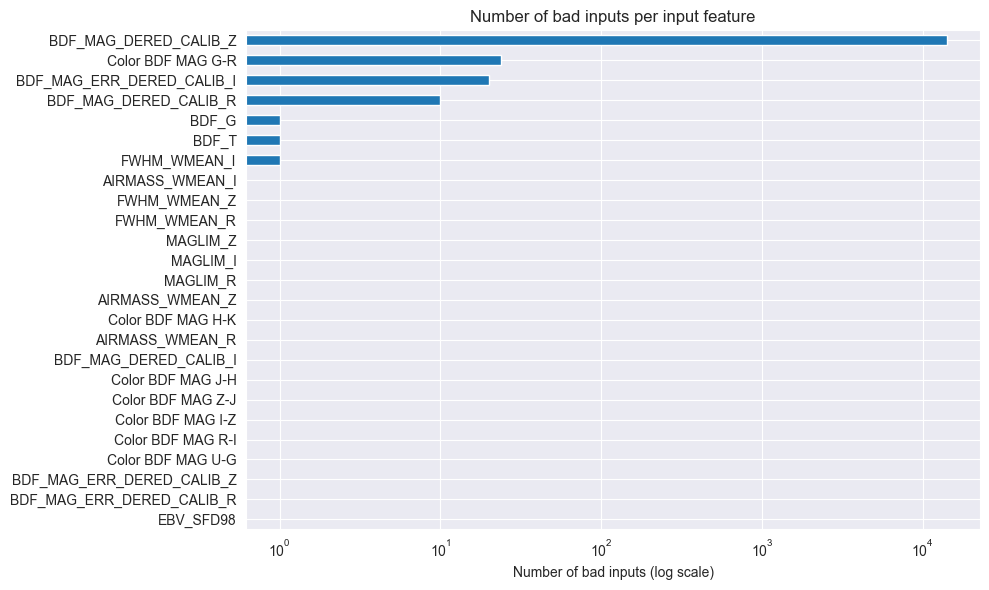

In [17]:
bad_input_feature_counts = pd.Series(bad_input_mask.sum(axis=0), index=input_columns)
bad_input_feature_counts_sorted = bad_input_feature_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bad_input_feature_counts_sorted.plot.barh()
plt.xscale("log")  # logarithmische Skala auf der x-Achse
plt.xlabel("Number of bad inputs (log scale)")
plt.title("Number of bad inputs per input feature")
plt.gca().invert_yaxis()  # größte oben
plt.tight_layout()
plt.show()

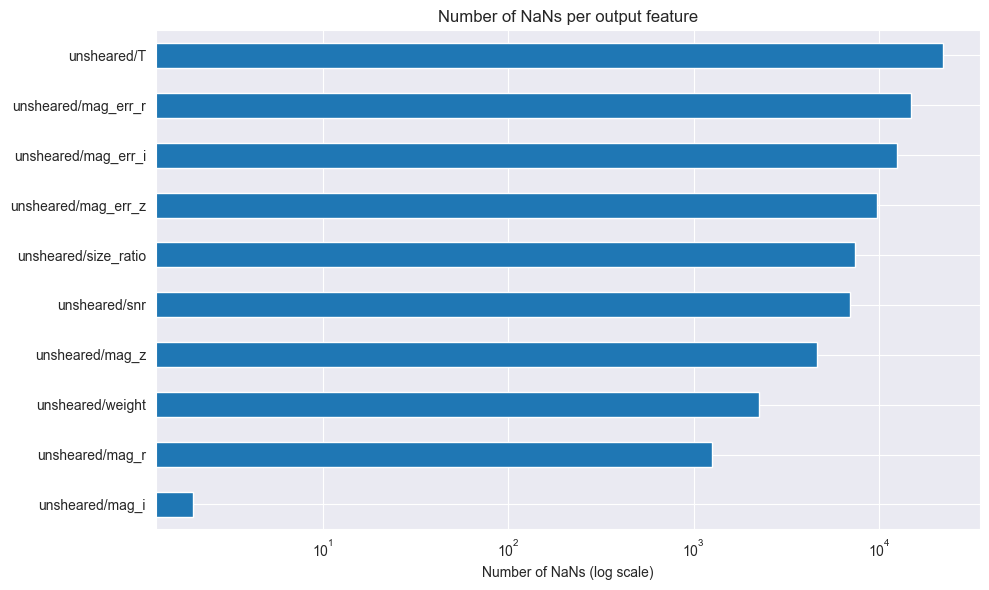

In [18]:
output_nan_counts = pd.Series(np.isnan(outputs).sum(axis=0), index=output_columns)
output_nan_counts_sorted = output_nan_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
output_nan_counts_sorted.plot.barh()
plt.xscale("log")  # logarithmische Skala auf der x-Achse
plt.xlabel("Number of NaNs (log scale)")
plt.title("Number of NaNs per output feature")
plt.gca().invert_yaxis()  # größte oben
plt.tight_layout()
plt.show()

In [23]:
input_columns = lst_input_columns_gandalf
output_columns = lst_target_columns_gandalf

input_columns = [col.replace("_trans", "") for col in input_columns]
output_columns = [col.replace("_trans", "") for col in output_columns]

inputs = df_gandalf_cut_columns[input_columns].to_numpy()
outputs = df_gandalf_cut_columns[output_columns].to_numpy()

n_samples, n_features = inputs.shape
n_outputs = outputs.shape[1]

allowed_ranges = np.stack([
    df_balrog_columns[input_columns].min().to_numpy(),
    df_balrog_columns[input_columns].max().to_numpy()
], axis=1)

has_at_least_one_bad_feature = np.any(
    (inputs < allowed_ranges[:, 0]) | (inputs > allowed_ranges[:, 1]),
    axis=1
)

has_nan_output = np.any(np.isnan(outputs), axis=1)

has_bad_feature_and_has_nan = has_at_least_one_bad_feature & has_nan_output
has_bad_feature_but_doesnt_have_nan = has_at_least_one_bad_feature & (~has_nan_output)
has_good_feature_and_has_nan = (~has_at_least_one_bad_feature) & has_nan_output
has_good_feature_and_no_nan = (~has_at_least_one_bad_feature) & (~has_nan_output)

total_samples = len(outputs)

n_bad_input_and_nan = np.sum(has_bad_feature_and_has_nan)
n_bad_input_no_nan = np.sum(has_bad_feature_but_doesnt_have_nan)
n_good_input_and_nan = np.sum(has_good_feature_and_has_nan)
n_good_input_no_nan = np.sum(has_good_feature_and_no_nan)

print(f"Number of samples with bad inputs and NaNs in the output: {n_bad_input_and_nan} ({n_bad_input_and_nan / total_samples:.4%})")
print(f"Number of samples with bad inputs but no NaNs in the output: {n_bad_input_no_nan} ({n_bad_input_no_nan / total_samples:.4%})")
print(f"Number of samples with good inputs and NaNs in the output: {n_good_input_and_nan} ({n_good_input_and_nan / total_samples:.4%})")
print(f"Number of samples with good inputs and no NaNs in the output: {n_good_input_no_nan} ({n_good_input_no_nan / total_samples:.4%})")

categories = np.full(len(outputs), "good_input + good_output")
categories[has_bad_feature_and_has_nan] = "bad_input + NaN"
categories[has_bad_feature_but_doesnt_have_nan] = "bad_input + good_output"
categories[has_good_feature_and_has_nan] = "good_input + NaN"

# df_gandalf.loc[df_gandalf_columns.index, "input_output_category"] = categories

means = df_balrog_columns[input_columns].mean().to_numpy()
stds = df_balrog_columns[input_columns].std().to_numpy()

z_scores = (inputs - means) / stds

for i in range(1, 5):
    sigma_threshold = i

    has_at_least_one_sigma_outlier = np.any(np.abs(z_scores) > sigma_threshold, axis=1)

    has_sigma_outlier_and_nan = has_at_least_one_sigma_outlier & has_nan_output
    has_sigma_outlier_but_no_nan = has_at_least_one_sigma_outlier & (~has_nan_output)
    has_no_outlier_and_nan = (~has_at_least_one_sigma_outlier) & has_nan_output
    has_no_outlier_and_no_nan = (~has_at_least_one_sigma_outlier) & (~has_nan_output)

    n_outlier_and_nan = np.sum(has_sigma_outlier_and_nan)
    n_outlier_no_nan = np.sum(has_sigma_outlier_but_no_nan)
    n_no_outlier_and_nan = np.sum(has_no_outlier_and_nan)
    n_no_outlier_and_no_nan = np.sum(has_no_outlier_and_no_nan)

    print(f"NaNs from outlier inputs (> {sigma_threshold}σ): {n_outlier_and_nan} ({n_outlier_and_nan / total_samples:.4%})")
    print(f"Valid outputs from outlier inputs: {n_outlier_no_nan} ({n_outlier_no_nan / total_samples:.4%})")
    print(f"NaNs from inlier inputs: {n_no_outlier_and_nan} ({n_no_outlier_and_nan / total_samples:.4%})")
    print(f"Valid outputs from inlier inputs: {n_no_outlier_and_no_nan} ({n_no_outlier_and_no_nan / total_samples:.4%})")

# Gesamtzahl einzelner NaNs im Output (über alle Features)
total_output_nans = np.isnan(outputs).sum()

# Gesamtzahl einzelner "bad" Inputs (Feature-wise out-of-range)
bad_input_mask = (inputs < allowed_ranges[:, 0]) | (inputs > allowed_ranges[:, 1])
total_bad_inputs = bad_input_mask.sum()

print(f"Total number of NaNs in output (across all features and samples): {total_output_nans}")
print(f"Total number of individual bad input features: {total_bad_inputs}")

if total_bad_inputs > 0:
    print(f"Ratio of NaNs to bad inputs: {total_output_nans / total_bad_inputs:.2f}")

Number of samples with bad inputs and NaNs in the output: 1 (0.0000%)
Number of samples with bad inputs but no NaNs in the output: 4 (0.0002%)
Number of samples with good inputs and NaNs in the output: 3365 (0.1440%)
Number of samples with good inputs and no NaNs in the output: 2333742 (99.8558%)
NaNs from outlier inputs (> 1σ): 3298 (0.1411%)
Valid outputs from outlier inputs: 2262548 (96.8096%)
NaNs from inlier inputs: 68 (0.0029%)
Valid outputs from inlier inputs: 71198 (3.0464%)
NaNs from outlier inputs (> 2σ): 1599 (0.0684%)
Valid outputs from outlier inputs: 866611 (37.0804%)
NaNs from inlier inputs: 1767 (0.0756%)
Valid outputs from inlier inputs: 1467135 (62.7756%)
NaNs from outlier inputs (> 3σ): 472 (0.0202%)
Valid outputs from outlier inputs: 197563 (8.4533%)
NaNs from inlier inputs: 2894 (0.1238%)
Valid outputs from inlier inputs: 2136183 (91.4027%)
NaNs from outlier inputs (> 4σ): 214 (0.0092%)
Valid outputs from outlier inputs: 82362 (3.5241%)
NaNs from inlier inputs: 315

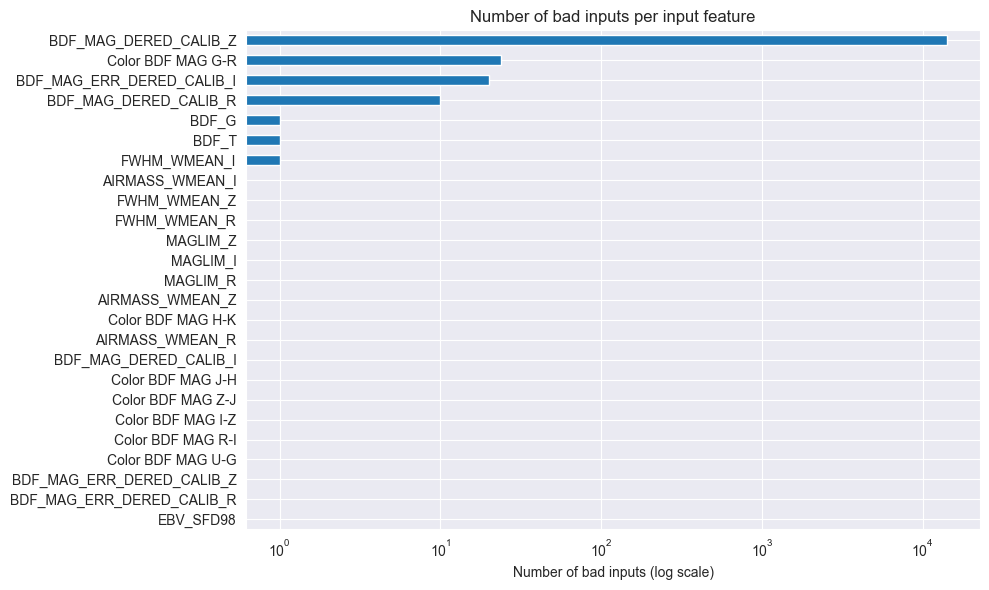

In [20]:
bad_input_feature_counts = pd.Series(bad_input_mask.sum(axis=0), index=input_columns)
bad_input_feature_counts_sorted = bad_input_feature_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bad_input_feature_counts_sorted.plot.barh()
plt.xscale("log")  # logarithmische Skala auf der x-Achse
plt.xlabel("Number of bad inputs (log scale)")
plt.title("Number of bad inputs per input feature")
plt.gca().invert_yaxis()  # größte oben
plt.tight_layout()
plt.show()

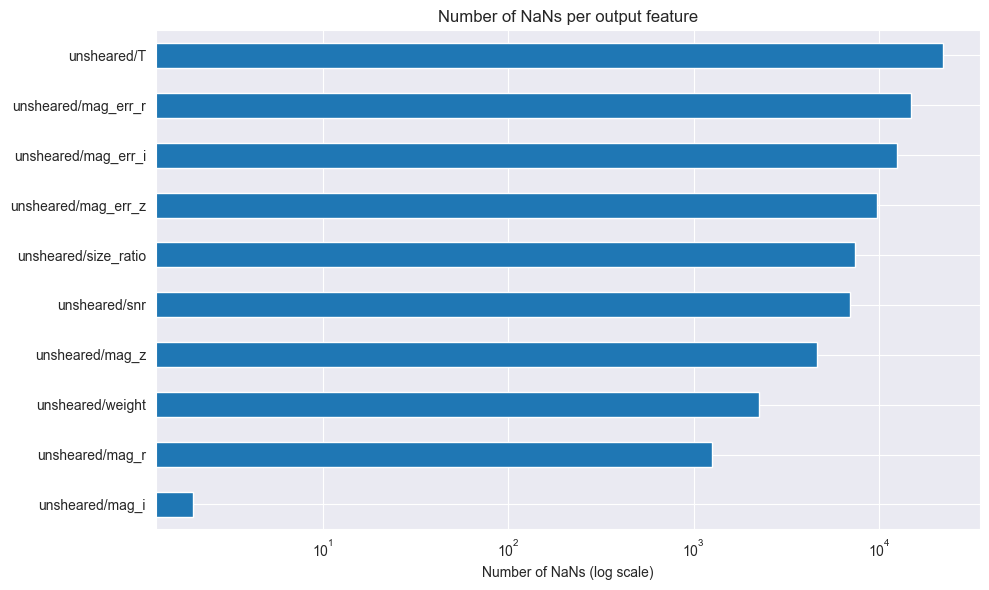

In [28]:
output_nan_counts = pd.Series(np.isnan(outputs).sum(axis=0), index=output_columns)
output_nan_counts_sorted = output_nan_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
output_nan_counts_sorted.plot.barh()
plt.xscale("log")  # logarithmische Skala auf der x-Achse
plt.xlabel("Number of NaNs (log scale)")
plt.title("Number of NaNs per output feature")
plt.gca().invert_yaxis()  # größte oben
plt.tight_layout()
plt.show()